In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PR/europarl-v10.sv-en.tsv', sep='\t', on_bad_lines='skip')
print(df)

<ipython-input-3-3386066ed667>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/PR/europarl-v10.sv-en.tsv', sep='\t', on_bad_lines='skip')


                                                        4.  \
0        Ratificeringen och genomförandet av de uppdate...   
1                                                       7.   
2        Hållbart jordbruk och biogas: behov av översyn...   
3                         - Före omröstningen om punkt 41:   
4        föredragande. - (EN) Herr talman! Vi kom övere...   
...                                                    ...   
1766114                          Omröstningen är avslutad.   
1766115          Kolleger! Vi har femtio röstförklaringar.   
1766116                     Ni vet alla vad detta innebär.   
1766117  Jag kommer att vara mycket snabb och kommer at...   
1766118  Jag ber om ursäkt för detta, men vi måste håll...   

                                                      4..1  \
0        The ratification and implementation of the upd...   
1                                                       7.   
2        Sustainable agriculture and biogas: review of ...   
3      

In [4]:
df.head()

,4.,4..1,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ratificeringen och genomförandet av de uppdate...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,7.,7.,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
2,Hållbart jordbruk och biogas: behov av översyn...,Sustainable agriculture and biogas: review of ...,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
3,- Före omröstningen om punkt 41:,- Before the vote on paragraph 41:,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
4,föredragande. - (EN) Herr talman! Vi kom övere...,"rapporteur. - Mr President, we agreed to chang...",ep-08-03-12-005-07.txt,005-07,101.0,Csaba Sándor Tabajdi,NaN,NaN


In [5]:
df.shape

(1766119, 8)

In [6]:
df.rename(columns={'4.': 'sv', '4..1': 'en'}, inplace=True)

In [7]:
df.head()

,sv,en,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Ratificeringen och genomförandet av de uppdate...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,7.,7.,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
2,Hållbart jordbruk och biogas: behov av översyn...,Sustainable agriculture and biogas: review of ...,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
3,- Före omröstningen om punkt 41:,- Before the vote on paragraph 41:,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
4,föredragande. - (EN) Herr talman! Vi kom övere...,"rapporteur. - Mr President, we agreed to chang...",ep-08-03-12-005-07.txt,005-07,101.0,Csaba Sándor Tabajdi,NaN,NaN


In [8]:
data=df[['sv','en']]

In [9]:
data.head()

,sv,en
0,Ratificeringen och genomförandet av de uppdate...,The ratification and implementation of the upd...
1,7.,7.
2,Hållbart jordbruk och biogas: behov av översyn...,Sustainable agriculture and biogas: review of ...
3,- Före omröstningen om punkt 41:,- Before the vote on paragraph 41:
4,föredragande. - (EN) Herr talman! Vi kom övere...,"rapporteur. - Mr President, we agreed to chang..."


In [10]:
data.isnull().sum()

sv     2271
en    10452
dtype: int64

In [11]:
data=data.dropna()

In [12]:
data.isnull().sum()

sv    0
en    0
dtype: int64

In [13]:
def contains_alphabetic(cell):
  return any(char.isalpha() for char in str(cell))

contains_alphabetic(data['en'][1])
for i in data['en']:
  if contains_alphabetic(i)==False:
    index_to_drop= data[data['en'] == i].index
    data = data.drop(index_to_drop)

In [14]:
from transformers import AutoTokenizer
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

In [15]:
model_checkpoint = "Helsinki-NLP/opus-mt-en-sv"

In [16]:
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-sv")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-sv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/815k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/295M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [18]:
data['en'][0]

'The ratification and implementation of the updated ILO conventions (vote)'

In [19]:
max_input_length = 128
max_target_length = 128

In [20]:
type(data['en'][0])

str

In [21]:
data.shape

(1744597, 2)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_df, val_df = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
train_df.head()

,sv,en
343951,Jag stöder föredragande Turmes i hans försök a...,"I support Mr Turmes, our rapporteur, in his at..."
608722,Det är lämpligt att jag försäkrar er att denna...,It is appropriate that I should reassure you t...
1615446,Vad kan vi se?,What can we see?
1253375,Jag kan försäkra kammaren att både kommissione...,I can assure the House that both the Commissio...
1088864,Som ledamot av Gruppen för demokratiernas och ...,As a member of the Group for a Europe of Democ...


In [25]:
val_df.head()

,sv,en
1439705,Inom energisektorn finns det inget projekt på ...,"As far as the energy sector is concerned, no p..."
263370,"Herr talman, kommissionens företrädare! Med st...","Mr President, Commissioner, the Charter of Fun..."
1458397,Jag kommer nu att tala som föredragande för pa...,I will now speak as rapporteur for the Parliam...
892811,Herr Trichet! Vi ser fram emot era synpunkter ...,"We look forward to your feedback, Mr Trichet, ..."
1634553,För det tredje: Det försummade näringslivet må...,My third point is that the sustainable economy...


In [26]:
tokenizer(["Hello, this is a sentence!", "This is another sentence."])

{'input_ids': [[4134, 3, 56, 28, 15, 8218, 62, 0], [134, 28, 715, 8218, 2, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}

In [28]:
data['sv'][0]

'Ratificeringen och genomförandet av de uppdaterade ILO-konventionerna (omröstning)'

In [30]:
tokenizer(data['sv'][0])

{'input_ids': [18204, 7350, 63, 7567, 8, 8294, 1028, 704, 427, 34, 13, 37, 133, 558, 12530, 4385, 82, 15746, 23, 3104, 29201, 270, 29, 1028, 6115, 6, 34, 387, 36, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [31]:
import torch

In [32]:
input_text = "This is a test sentence."

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True).to('cpu')

with torch.no_grad():
    outputs = model.generate(**inputs)

translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Original text: {input_text}")
print(f"Translated text: {translated_text}")


Original text: This is a test sentence.
Translated text: Det här är en test mening.


In [33]:
inputs_train = tokenizer(train_df['en'].tolist(),max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")
inputs_val = tokenizer(val_df['en'].tolist(),max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")

In [34]:
with tokenizer.as_target_tokenizer():
        labels_train = tokenizer(train_df['sv'].tolist(), max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")
        labels_val = tokenizer(val_df['sv'].tolist(), max_length=max_target_length, padding=True, truncation=True, return_tensors="pt")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4016: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [35]:
input_inputs_train = inputs_train['input_ids']
input_masks_train = inputs_train['attention_mask']
output_labels_train=labels_train['input_ids']
output_masks_train = labels_train['attention_mask']
input_inputs_val = inputs_val['input_ids']
input_masks_val = inputs_val['attention_mask']
output_labels_val=labels_val['input_ids']
output_masks_val = labels_val['attention_mask']

In [36]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

In [37]:
batch_size = 16

train_data_t = TensorDataset(input_inputs_train, input_masks_train, output_labels_train, output_masks_train)
train_sampler = RandomSampler(train_data_t)
train_dataloader = DataLoader(train_data_t, sampler=train_sampler, batch_size=batch_size)

val_data_t = TensorDataset(input_inputs_val, input_masks_val, output_labels_val, output_masks_val)
val_sampler = RandomSampler(val_data_t)
val_dataloader = DataLoader(val_data_t, sampler=val_sampler, batch_size=batch_size)

In [38]:
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [40]:
num_encoder_layers = len(model.model.encoder.layers)
num_decoder_layers = len(model.model.decoder.layers)

print(f'Number of encoder layers: {num_encoder_layers}')
print(f'Number of decoder layers: {num_decoder_layers}')

Number of encoder layers: 6
Number of decoder layers: 6


In [41]:
N = 5  
for param in model.model.encoder.layers[:N]:
    for param in param.parameters():
        param.requires_grad = False

for param in model.model.decoder.layers[:N]:
    for param in param.parameters():
        param.requires_grad = False

In [42]:
for i, layer in enumerate(model.model.encoder.layers[:6]):
    for param in layer.parameters():
        print(f"Encoder Layer {i} parameter requires_grad: {param.requires_grad}")


Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 0 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer 1 parameter requires_grad: False
Encoder Layer

In [45]:
import numpy as np

model.train()
model = model.to(device)
epochs=[]
loss_values=[]
for epoch in range(5):
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels, b_label_mask  = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {avg_epoch_loss:.4f}')

Epoch 1, Loss: 0.2512
Epoch 2, Loss: 0.2451
Epoch 3, Loss: 0.2417
Epoch 4, Loss: 0.2393
Epoch 5, Loss: 0.2375


In [46]:
torch.save(model.state_dict(), 'model_weights_en-sv.pth')

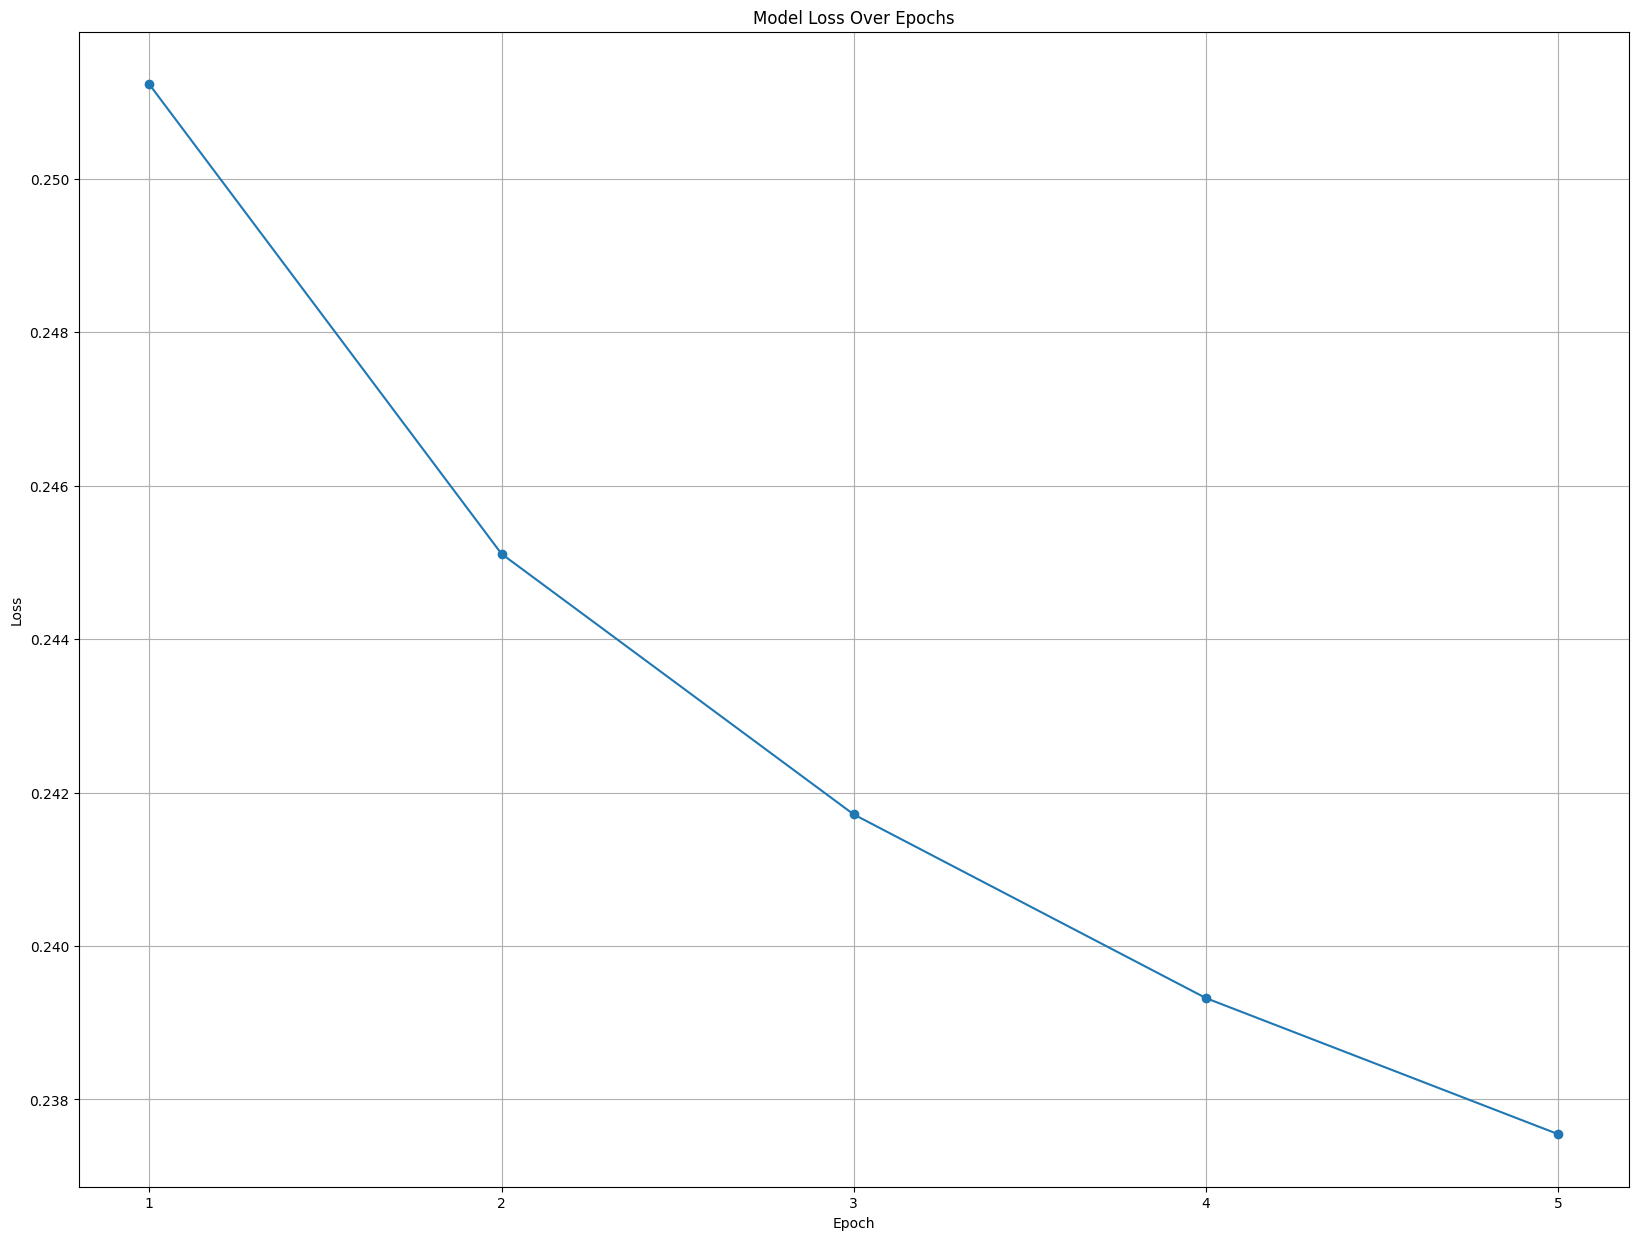

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot(epochs, loss_values, marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [49]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [50]:
def validate_model(model, validation_dataloader, device):
    model.eval()
    total_val_loss = 0
    references = []
    hypotheses = []
    smoothie = SmoothingFunction().method4  

    with torch.no_grad():
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels, b_label_mask = batch

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            generated_ids = model.generate(
                input_ids=b_input_ids,
                attention_mask=b_input_mask,
                max_length=128,  
                num_beams=4,
                early_stopping=True
            )

            for i in range(len(generated_ids)):
                pred_sentence = generated_ids[i].tolist()
                true_sentence = b_labels[i][b_label_mask[i] == 1].tolist()

                hypotheses.append(pred_sentence)
                references.append([true_sentence])

    avg_val_loss = total_val_loss / len(validation_dataloader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

    bleu_score = np.mean([sentence_bleu(ref, hyp, smoothing_function=smoothie) for ref, hyp in zip(references, hypotheses)])
    print(f'BLEU Score: {bleu_score:.4f}')

    return avg_val_loss, bleu_score
validation_loss, bleu_score = validate_model(model, val_dataloader, device)

Validation Loss: 3.0053
BLEU Score: 0.0229
